In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
colors = {
    'Testing': '#1f77b4',
    'HTTP Clients': '#ff7f0e',
    'Utility': '#2ca02c',
    'Serialization': '#d62728',
    'Filesystem': '#9467bd',  # 使用颜色编码定义颜色
    'Crypto': '#8c564b',
    'Auth': '#cea2fd',
    'Web Framework': '#7f7f7f',
    'Deep Learning': '#bcbd22',
    'HTML': '#17becf',
    'Logging': '#e377c2',
    'Database': '#029386',
    'Documentation': '#ff7f0e',
    'Codestyle': '#ae7181',
    'Graphic': '#c20078',
    'Scientific': '#9467bd',  # 使用颜色编码定义颜色
    'Building': '#8c564b',
    'Dependency Injection': '#d1b26f',
    'Metric': '#bcbd22',
    'UI': '#17becf',
    'Typescript': '#6e750e'
}


def draw_total_domain_dist(language):
    small_num = {'python': 7, 'java': 4, 'js': 5}
    dist = {
        'python': [2.2, 0.14],
        'java': [1.8, 0.14],
        'js': [1.8, 0.14]
    }
    df = pd.read_csv(f'migration/{language}_migration_group.csv')
    df = pd.DataFrame([(tup.repo_name, tup.time_stamp, tup.pattern, domain)
                       for tup in df.itertuples()
                       for domain in str(tup.domain).split('&')])
    df.columns = ['repo_name', 'time_stamp', 'pattern', 'domain']
    domain_df = df['domain'].value_counts().reset_index()
    domain_df.columns = ['domain', 'num']

    labels = domain_df['domain']
    data = domain_df['num']
    small_label_num = small_num[language]

    labels = [
        f"{label} ({x}, {100 * x / sum(data):.2f}%)"
        for label, x in zip(labels, data)
    ]
    fig, ax = plt.subplots(figsize=(6, 3))
    patches, texts = ax.pie(
        [x for x in data],
        labels=labels[0:len(labels) - small_label_num] +
        [""] * small_label_num,
        shadow=False,
        startangle=90,
        labeldistance=1.1,
        pctdistance=0.8,
        colors=[colors[label] for label in domain_df['domain']])
    plt.setp(texts, fontsize=9)
    ax.axis(
        'equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")
    for i in range(-small_label_num, 0):
        p = patches[i]
        ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i],
                    xy=(x, y),
                    xytext=(1 * np.sign(x),
                            (dist[language][0] + dist[language][1] * i) * y),
                    horizontalalignment=horizontalalignment,
                    **kw, fontsize=9)
    plt.subplots_adjust(left=0.5, right=0.8, top=0.6, bottom=0.1)
    fig.savefig(f"pic/{language}_domain_group.pdf",
                bbox_inches="tight")

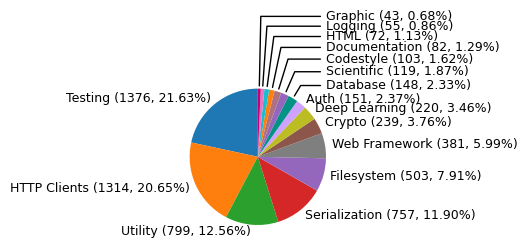

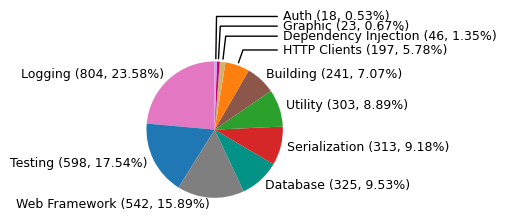

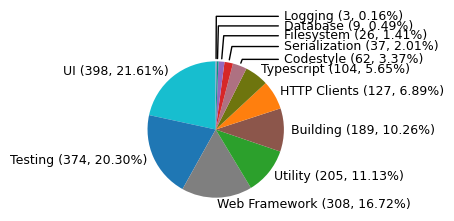

In [2]:
draw_total_domain_dist('python')
draw_total_domain_dist('java')
draw_total_domain_dist('js')


In [3]:
domains_l = {
    'python': [
        'Testing', 'HTTP Clients', 'Web Framework', 'Utility', 'Serialization',
        'Database', 'Filesystem', 'Crypto', 'Auth', 'Deep Learning',
        'HTML', 'Logging', 'Documentation', 'Format', 'Graphic', 'Scientific'
    ],
    'java': [
        'Testing', 'HTTP Clients', 'Web Framework', 'Utility', 'Serialization',
        'Database', 'Building', 'Logging', 'Dependency Injection', 'Graphic',
        'Metric', 'Auth'
    ],
    'js': [
        'Testing', 'HTTP Clients', 'Web Framework', 'Utility', 'Serialization',
        'Building', 'UI', 'Codestyle', 'Typescript', 'Filesystem',
        'Database', 'Logging'
    ]
}


def draw_domain_dist_evo(language):
    last_domain = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    x = [i for i in np.arange(2005, 2021)]
    domains = domains_l[language][:10]
    domain_evo = pd.read_csv(f'temp/domain_{language}_evo_group.csv')
    fig, ax = plt.subplots(figsize=(5, 2))
    for i in range(len(domains)):
        domain, color, label = domains[i], colors[domains[i]], domains[i]
        now_domain = np.array(
            domain_evo[domain_evo['domain'] == domain]['num'].values,
            dtype=np.int64)
        ax.bar(x,
               now_domain,
               width=0.85,
               color=color,
               label=label,
               bottom=last_domain)
        last_domain += now_domain
    ax.set_xlabel("Year")
    ax.set_ylabel("#Migrations")
    ax.set_xticks(np.arange(2005, 2021, 3))
    ax.legend(title='', loc='upper left', fontsize=6.5)
    fig.savefig(f"pic/{language}_domain_evo.pdf", bbox_inches="tight")
    plt.show()

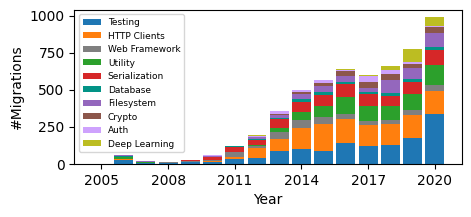

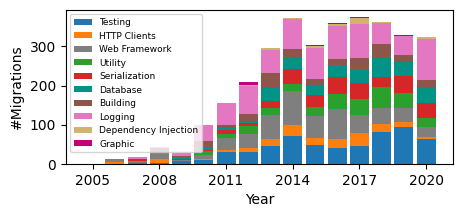

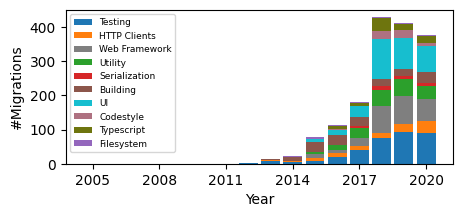

In [4]:
from datautil import cal_domain_evo

for language in ['java', 'python', 'js']:
    cal_domain_evo(language)

draw_domain_dist_evo('python')
draw_domain_dist_evo('java')
draw_domain_dist_evo('js')